<a href="https://colab.research.google.com/github/kaisarmasum/IBM-Quantum-Challenge-2024/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Install Qiskit, if needed

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install prototype-zne
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=5f8aea8befef0de20d8d8dabd0c9373926df69cfe227641737bfc90775e2d4bd
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
### Save API Token, if needed
%set_env QXToken=2dad4afe8e00693c1664e830bbdbf68510cdceddb8b56a140dd35ce0947602494fc318c40bb3502263bf05cfa9f155d28af55d635737f4bff028b3b593a46042
# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=2dad4afe8e00693c1664e830bbdbf68510cdceddb8b56a140dd35ce0947602494fc318c40bb3502263bf05cfa9f155d28af55d635737f4bff028b3b593a46042


In [3]:
# imports
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [4]:
# Setup the grader
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

**Part I: Qiskit states, the new and the old**

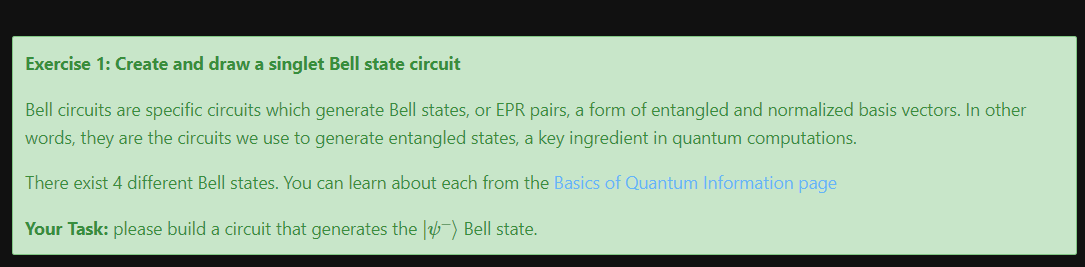

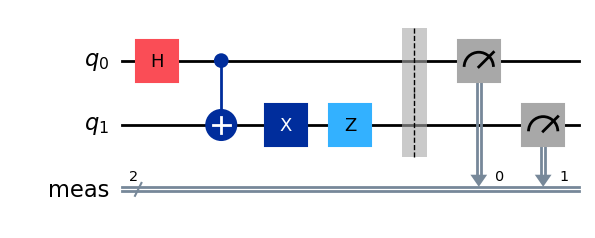

In [5]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc

qc = QuantumCircuit(2)

### Write your code below here ###
qc.h(0)
qc.cx(0, 1)
qc.x(1)
qc.z(1)


### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

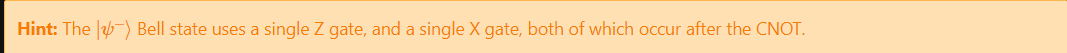

In [6]:
# Submit your answer using following code

grade_lab1_ex1(qc) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


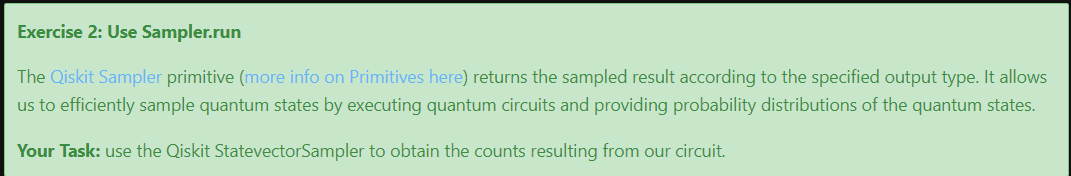

In [11]:
qc.measure_all()

### Write your code below here ###

from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()#Add your code here
pub = (qc)#Add your code here
job_sampler = sampler.run([pub], shots=100) #Add your code here


### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'10': 48, '01': 52}


In [12]:
# Submit your answer using following code

grade_lab1_ex2(job_sampler) # Expected result type: PrimitiveJob

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


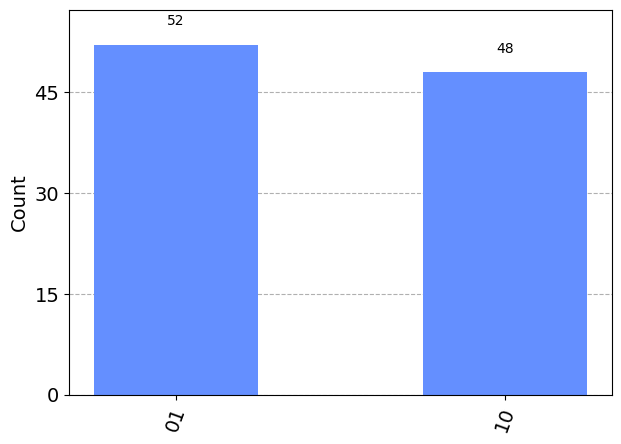

In [13]:
plot_histogram(counts_sampler)

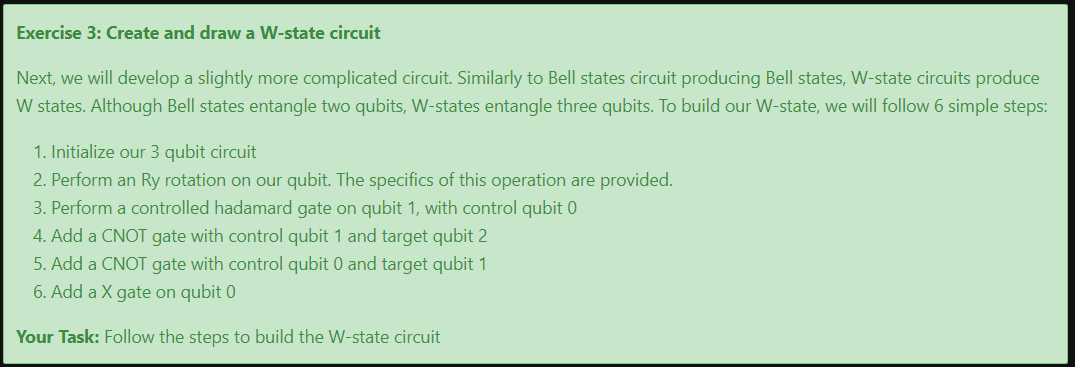

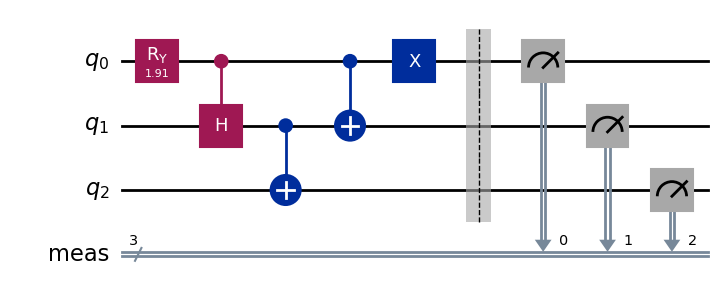

In [14]:
# Step 1
qc = QuantumCircuit(3) #your_code_here

# Step 2 (provided)
qc.ry(1.91063324, 0)

# Add steps 3-6 below

# Step 3: Perform a controlled Hadamard gate on qubit 1, with control qubit 0
qc.ch(0, 1)

# Step 4: Add a CNOT gate with control qubit 1 and target qubit 2
qc.cx(1, 2)

# Step 5: Add a CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)

# Step 6: Add an X gate on qubit 0
qc.x(0)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [16]:
# Submit your answer using following code

grade_lab1_ex3(qc) # Expected result type: # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [17]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'010': 3335, '001': 3382, '100': 3283}


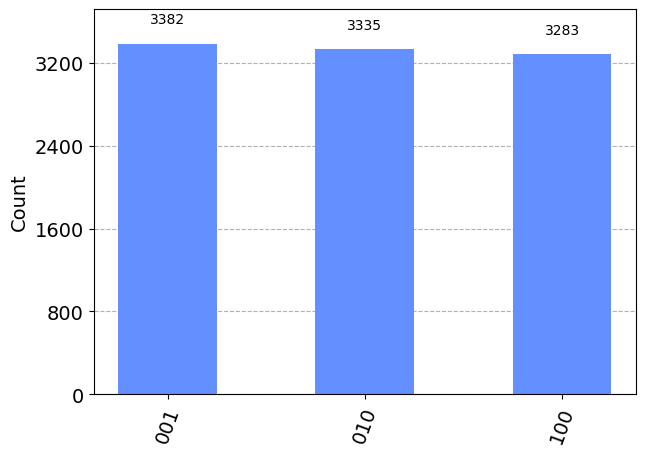

In [18]:
plot_histogram(counts_sampler)

In [19]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


**Setup and run a VQE algorithm**

Now, we'll start setting up our VQE algorithm. Variational quantum eigensolvers (VQEs), are hybrid algorithms that utilize quantum and classical techniques to find the ground state of a given physical system. They are often used in quantum chemistry and optimization problems, and are promising candidates for hybrid-algorithms in noisy near-term devices.

VQEs are characterized by the use of a classical optimization algorithm to iteratively improve upon a parameterized trial solution, called an "ansatz". The aim is to solve for the ground state of a given Hamiltonian represented as a linear combination of Pauli terms.

Executing a VQE algorithm requires these three steps:

Setting up the Hamiltonian and ansatz (problem specification)
Implementing the Qiskit Runtime estimator
Adding the Classical optimizer and running our program
We we will follow these steps.
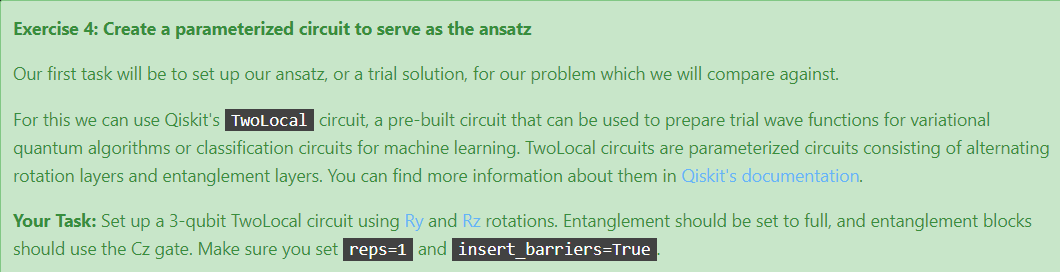

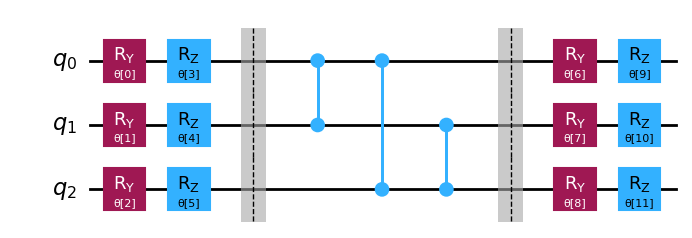

In [21]:
from qiskit.circuit.library import TwoLocal
num_qubits = 3 #Add your code here
# Rotation blocks using Ry and Rz gates
rotation_blocks = ['ry', 'rz'] #Add your code here
# Entanglement blocks using Cz gates
entanglement_blocks = 'cz' #Add your code here
# Full entanglement
entanglement = 'full' #Add your code here

# Create the TwoLocal ansatz with the specified parameters
ansatz = TwoLocal(num_qubits=num_qubits,
                  rotation_blocks=rotation_blocks,
                  entanglement_blocks=entanglement_blocks,
                  entanglement=entanglement,
                  reps=1,
                  insert_barriers=True)  #Add your code here

### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

In [22]:
# Submit your answer using following code

grade_lab1_ex4(num_qubits, rotation_blocks, entanglement_blocks, entanglement) # Expected result type: int, List[str], str, str

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [23]:
num_params = ansatz.num_parameters
num_params

12

**Exercise 5: Transpile to ISA circuits**

In this example we will use the FakeSherbrooke, a fake (simulated) 127-qubit backend, useful for testing the transpiler and other backend-facing functionalities.

Preset pass managers are the default pass managers used by the transpile() function. transpile() provides a convenient and simple method to construct a standalone PassManager object that mirrors what the transpile function does when optimizing and transforming a quantum circuit for execution on a specific backend.

**Your Task:** Define the pass manager. Reference the Qiskit documentation for more info.

In [47]:
# Define the backend
backend_answer = FakeSherbrooke()

# Define the optimization level (0 to 3)
optimization_level_answer = 3

# Generate the preset pass manager
pm = generate_preset_pass_manager(backend=backend_answer, optimization_level=optimization_level_answer)

isa_circuit = pm.run(ansatz)

In [48]:
# Submit your answer using following code
grade_lab1_ex5(isa_circuit) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


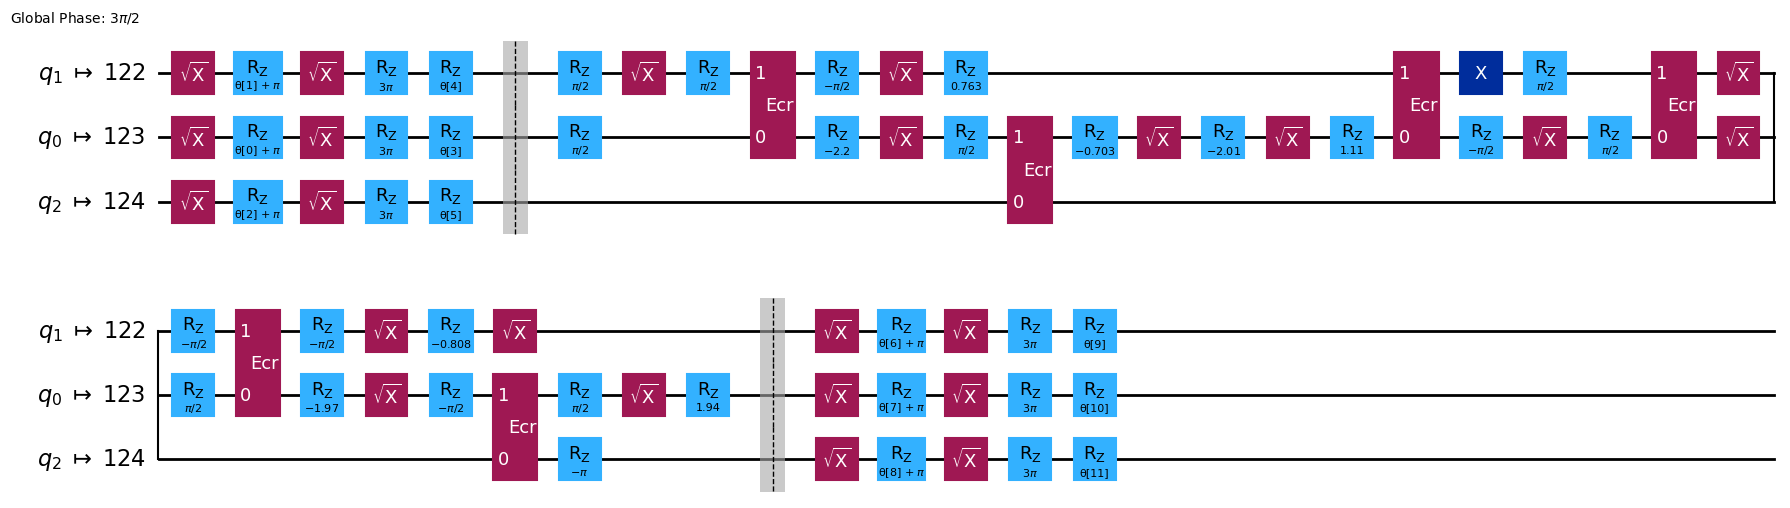

In [49]:
isa_circuit.draw('mpl', idle_wires=False,)

In [52]:
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

**Exercise 6: Defining the cost function**

Like many classical optimization problems, the solution to a VQE problem can be formulated as minimization of a scalar cost function. The cost function for our VQE is simple: the energy!

**Your Task:** Define a cost function by using Qiskit Runtime Estimator to find the energy for a given parameterized state and our Hamiltonian.

In [62]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub =  (ansatz, [hamiltonian], [params])#Add your code
    result = estimator.run(pubs=[pub]).result()#Add your code
    energy = result[0].data.evs[0]#Add your code

    callback_dict["iters"] += 1 #Add your code
    callback_dict["prev_vector"] =  params #Add your code
    callback_dict["cost_history"].append(energy)#Add your code


### Don't change any code past this line ###
    print(energy)
    return energy, result

In [63]:
# Submit your answer using following code

grade_lab1_ex6(cost_func) # Expected result type: Callable

[0.640625]
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [64]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [65]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([5.56473694, 0.06594518, 0.32821111, 2.14056867, 4.40243876,
       5.01015042, 3.5621019 , 4.57682518, 4.73649323, 5.36751064,
       3.85151991, 5.45897685])

**Exercise 7: QiskitRuntimeService V2 Primitives, local testing mode and Sessions, a first look**

Next, we will use the new QiskitRuntimeService V2 primitives: EstimatorV2 and SamplerV2.

The new Estimator interface lets you specify a single circuit and multiple observables and parameter value sets for that circuit, so that sweeps over parameter value sets and observables can be efficiently specified. Previously, you had to specify the same circuit multiple times to match the size of the data to be combined. Also, while you can still use optimization_level and resilience_level as the simple knobs, V2 primitives give you the flexibility to turn on or off individual error mitigation / suppression methods to customize them for your needs.

SamplerV2 is simplified to focus on its core task of sampling the quantum register from the execution of quantum circuits. It returns the samples, whose type is defined by the program, without weights. The output data is also separated by the output register names defined by the program. This change enables future support for circuits with classical control flow.

We will also use Qiskit's 1.0 local testing mode. Local testing mode (available with qiskit-ibm-runtime 0.22.0 or later) can be used to help develop and test programs before fine-tuning them and sending them to real quantum hardware.

**Your Task:** After using local testing mode to verify your program, all you need to do is change the backend name to run it on an IBM Quantum system.

In [66]:
### Select a Backend
## Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

#backend = FakeSherbrooke()
backend = AerSimulator()

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 30})

-0.58837890625
-0.94580078125
-1.14599609375
-0.8955078125
-1.1787109375
-0.443359375
-1.091796875
-0.49560546875
-0.6689453125
-0.37744140625
-1.150390625
-1.18310546875
-1.15966796875
-1.9892578125
-1.32421875
-2.2333984375
-2.70849609375
-2.17578125
-2.41845703125
-2.5361328125
-2.7939453125
-2.37548828125
-2.79736328125
-2.357421875
-2.7646484375
-2.60400390625
-2.6259765625
-2.47802734375
-2.82763671875
-2.88232421875


In [67]:
# Submit your answer using following code

grade_lab1_ex7(res) # Expected result type: OptimizeResult

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


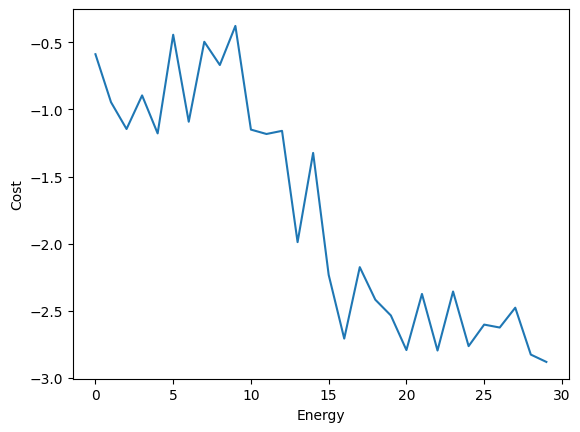

In [68]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Energy")
plt.ylabel("Cost")
plt.draw()